In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import time

In [68]:
def make_radius(peb_x, peb_y, x, y):
    return np.sqrt(((x - peb_x) ** 2) + ((y - peb_y) ** 2))

k = 1
xi_const = 3

def xi(peb_x, peb_y, x, y):
    radius = make_radius(peb_x, peb_y, x, y)
    return xi_const * np.sin(k * radius)

def fun(decay, x, y, x1=0, y1=0, phi=0):
    r = np.sqrt((x - x1)**2 + (y - y1)**2)
    decay = np.exp(-decay * r)
    return decay * np.sin(k * r - phi)

3D- saved.


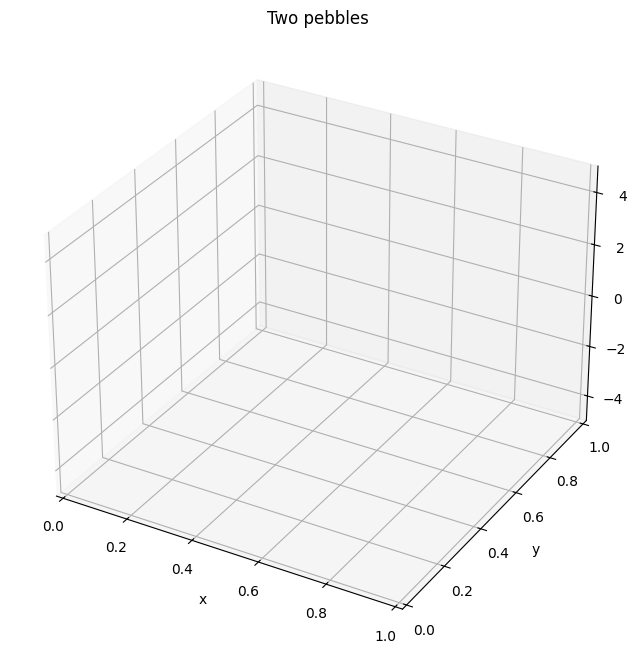

In [69]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Parameters
time = np.linspace(0, 10, 1500)  # Time values from 0 to 10 seconds

size = 40

x = np.linspace(-size, size, 1500)
y = np.linspace(-size, size, 1500)
X, Y = np.meshgrid(x, y)
Z = fun(0.1, X, Y, -20, -20)

X2, Y2 = np.meshgrid(x, y)
Z2 = fun(0.1, X2, Y2, 20, 20)

ax.set_title('Two pebbles')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_zlim(-5, 5)

surface = None

print('3D- saved.')

# ax.plot_surface(X, Y, Z + Z2, cstride=15, rstride=15, cmap=cm.inferno, linewidth=0)
# plt.show()

In [ ]:
size = 40
x = np.linspace(-size, size, 1500)
y = np.linspace(-size, size, 1500)
X, Y = np.meshgrid(x, y)
X2, Y2 = np.meshgrid(x, y)  # actually X2 = X, Y2 = Y

def animate(phi):
    global surface
    if surface:
        surface.remove()
    Z = fun(0.075, X, Y, 0, 0, phi)
    Z2 = fun(0.075, X2, Y2, -20, -20, phi)
    surface = ax.plot_surface(X, Y, Z, cmap=cm.inferno, cstride=7, rstride=7)
    return fig,

ani = animation.FuncAnimation(fig, animate, frames=np.linspace(0, 25, 25),
                              interval=1, blit=False)

writergif = animation.PillowWriter(fps=12)
ani.save('single-pebble.gif', writer=writergif)